In [1]:
import wfdb
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, hamming_loss,ConfusionMatrixDisplay,roc_curve, auc,roc_auc_score,precision_recall_curve
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import FunctionTransformer,StandardScaler
from mne.datasets import sample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, StratifiedShuffleSplit,RandomizedSearchCV
from mne_features.feature_extraction import extract_features, FeatureExtractor
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest,f_classif
import neurokit2 as nk
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay,permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import seaborn as sns
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [3]:
#120s interval data
X_train=np.load(r"C:\Users\piotr\features_cleaned_30s.npy")
y_train=np.load(r"C:\Users\piotr\labels_cleaned_30s.npy")
# X[np.isinf(X)]=np.nan
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit(X)
# X_train=imp_mean.transform(X)
X_test=np.load(r"C:\Users\piotr\features_cleaned_30s_test.npy")
y_test=np.load(r"C:\Users\piotr\labels_cleaned_30s_test.npy")
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# features_test[np.isinf(features_test)]=np.nan
# imp_mean.fit(features_test)
# X_test=imp_mean.transform(features_test)

In [4]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBClassifier",
    "Logistic Regression",
    "LGBMClassifier",
    "CatBoostClassifier",
    "Extra Trees",
    "Bagging Classifier",
    "HistGradientBoosting"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(),
    LogisticRegression(random_state=42, max_iter=1000),
    LGBMClassifier(random_state=42),
    CatBoostClassifier(verbose=0, random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    BaggingClassifier( random_state=42),
    HistGradientBoostingClassifier(random_state=42)
]

results = {}

for name, clf in zip(names, classifiers):
    pipe = make_pipeline(StandardScaler(), SelectKBest(f_classif, k=24), clf)
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    results[name] = np.mean(scores)
    print(f"Average cross-validation accuracy of {name}: {np.mean(scores):.4f}")

# Sort results by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\nSorted Model Performance:")
for name, score in sorted_results:
    print(f"{name}: {score:.4f}")

Average cross-validation accuracy of Nearest Neighbors: 0.6455
Average cross-validation accuracy of Linear SVM: 0.6975
Average cross-validation accuracy of RBF SVM: 0.6448
Average cross-validation accuracy of Decision Tree: 0.6664
Average cross-validation accuracy of Random Forest: 0.6928
Average cross-validation accuracy of Neural Net: 0.6911
Average cross-validation accuracy of AdaBoost: 0.6017
Average cross-validation accuracy of Naive Bayes: 0.6242
Average cross-validation accuracy of QDA: 0.6736
Average cross-validation accuracy of XGBClassifier: 0.6989
Average cross-validation accuracy of Logistic Regression: 0.6916


c:\Users\piotr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\piotr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\piotr\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\piotr\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt

Average cross-validation accuracy of LGBMClassifier: nan
Average cross-validation accuracy of CatBoostClassifier: 0.6903
Average cross-validation accuracy of Extra Trees: 0.6684
Average cross-validation accuracy of Bagging Classifier: 0.6841

Sorted Model Performance:
XGBClassifier: 0.6989
Linear SVM: 0.6975
Random Forest: 0.6928
Logistic Regression: 0.6916
Neural Net: 0.6911
QDA: 0.6736
Decision Tree: 0.6664
Naive Bayes: 0.6242
LGBMClassifier: nan
CatBoostClassifier: 0.6903
Bagging Classifier: 0.6841
Extra Trees: 0.6684
Nearest Neighbors: 0.6455
RBF SVM: 0.6448
AdaBoost: 0.6017


In [65]:
pipe = make_pipeline(StandardScaler(),
    XGBClassifier(random_state=42)
)

In [66]:
# Define hyperparameter search space
param_dist = {
    'xgbclassifier__max_depth': np.random.randint(3, 10, 5).tolist(),
    'xgbclassifier__learning_rate': np.linspace(0.01, 0.3, 6).tolist(),
    'xgbclassifier__gamma': np.linspace(0, 1, 5).tolist(),
    'xgbclassifier__n_estimators': np.random.randint(100, 600, 5).tolist(),
    'xgbclassifier__subsample': np.linspace(0.7, 1.0, 4).tolist(),
    'xgbclassifier__colsample_bytree': np.linspace(0.5, 1.0, 4).tolist(),
    'xgbclassifier__reg_lambda': np.logspace(-2, 1, 4).tolist(),
    'xgbclassifier__reg_alpha': np.logspace(-2, 1, 4).tolist(),
    'xgbclassifier__min_child_weight': np.random.randint(1, 6, 4).tolist(),
}
# Perform RandomizedSearchCV with 20 random samples
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=20,  # Number of random parameter sets to test
    scoring='roc_auc',  # Use ROC AUC for imbalanced data
    n_jobs=-1,
    cv=5,  # 5-fold cross-validation
    verbose=3,
    random_state=42
)

# Fit RandomizedSearch
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'xgbclassifier__subsample': 0.9, 'xgbclassifier__reg_lambda': 0.1, 'xgbclassifier__reg_alpha': 1.0, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.06799999999999999, 'xgbclassifier__gamma': 0.75, 'xgbclassifier__colsample_bytree': 0.5}
Best ROC AUC Score: 0.8238209195088597


In [68]:
pipe = make_pipeline(StandardScaler(),  XGBClassifier(
    subsample=0.9,
    reg_lambda=0.1,
    reg_alpha=1.0,
    n_estimators=250,
    min_child_weight=1,
    max_depth=4,
    learning_rate=0.07,
    gamma=0.75,
    colsample_bytree=0.5,
    random_state=42))
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.799812382739212
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      9782
           1       0.76      0.71      0.73      6208

    accuracy                           0.80     15990
   macro avg       0.79      0.78      0.79     15990
weighted avg       0.80      0.80      0.80     15990



In [70]:
xgb_model = pipe.named_steps['xgbclassifier']
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to map feature index to importance
feature_importance_df = pd.DataFrame({
    'Feature Index': np.arange(len(feature_importances)),
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display results
print(feature_importance_df)

    Feature Index  Importance
22             22    0.112999
62             62    0.053193
26             26    0.051846
9               9    0.050795
8               8    0.030320
..            ...         ...
59             59    0.004087
38             38    0.003935
40             40    0.003895
58             58    0.003753
60             60    0.003633

[65 rows x 2 columns]


In [71]:
np.arange(len(feature_importances))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [72]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=41)
scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation accuracy scores: [0.83872996 0.83904433 0.84030179 0.83841559 0.83244263]
Mean accuracy: 0.8377868594781515


ROC AUC Score: 0.8773112667359783


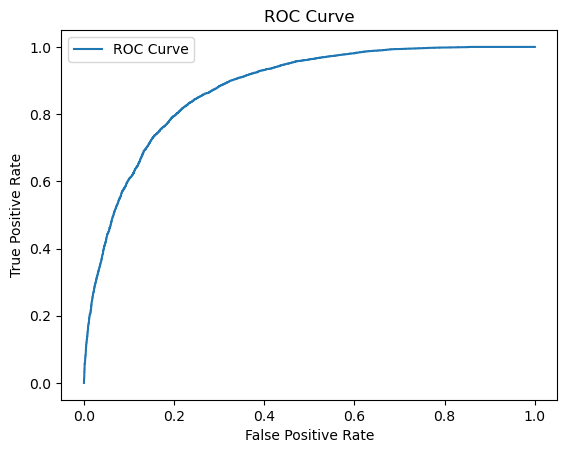

In [73]:
y_proba = pipe.predict_proba(X_test)[:, 1] 
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

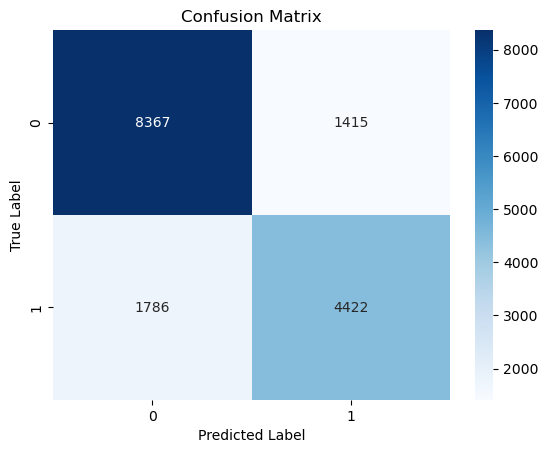

In [74]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [75]:
y_pred = pipe.predict(X_train)

# Evaluate performance
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Classification Report:\n", classification_report(y_train, y_pred))

Accuracy: 0.8785916378497328
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      9493
           1       0.85      0.84      0.85      6412

    accuracy                           0.88     15905
   macro avg       0.87      0.87      0.87     15905
weighted avg       0.88      0.88      0.88     15905



In [7]:
X=np.load(r"C:\Users\piotr\features_cleaned_60s.npy")

In [14]:
np.where(np.isinf(X).any(axis=1))

(array([   49,   861,  1173,  1566,  1685,  2388,  2393,  2458,  2459,
         2485,  2512,  2518,  2528,  2546,  2551,  2556,  2660,  2662,
         2683,  2745,  2749,  2755,  2757,  2758,  2772,  2820,  2861,
         3363,  3924,  3933,  3982,  4012,  4402,  4406,  4408,  4422,
         4441,  4462,  4528,  4541,  4542,  4637,  4643,  4646,  4755,
         4796,  4832,  4908,  4926,  5008,  5035,  5074,  5093,  5099,
         5141,  5175,  5204,  5208,  5241,  5242,  5256,  5277,  5305,
         5604,  5744,  5830,  5834,  6447,  6594,  6738,  6762,  6778,
         6822,  6838,  6842,  7050,  7051,  7487,  7547,  7656,  8131,
         8255,  8266,  8275,  8285,  8340,  8342,  8511,  8523,  8646,
         8767,  9320,  9340,  9377,  9391,  9419,  9464,  9558,  9562,
         9804,  9865,  9868, 10016, 10087, 10113, 10124, 10570, 10697,
        10814, 11218, 11321, 11495, 11573, 12018, 12065, 12180, 12280,
        12300, 12473, 12482, 12485, 12495, 12497, 12511, 12514, 12530,
      

In [17]:
X[np.where(np.isinf(X).any(axis=1))]
np.unique(y_train[np.where(np.isinf(X).any(axis=1))],return_counts=True)

(array([0, 1]), array([130,  54], dtype=int64))

In [18]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([9493, 6412], dtype=int64))